In [1]:
import sys
import glob

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [12]:
def analyse(file_pattern):
    dfs = []
    for f in glob.glob(f"../results/{file_pattern}"):
        print(f)
        df = pd.read_csv(f)    
        m = int(f.split("/")[-1].split("-")[4][1:])
        df["m"] = m
        dfs.append(df)
    
    df = pd.concat(dfs)
    
    mean_win = df.groupby(["acquire_pairs_function", "m"]).win.mean().unstack()
    std = df.groupby(["acquire_pairs_function", "m", "seed"]).win.mean().groupby(["acquire_pairs_function", "m"]).std().unstack()
    n = df.groupby(["acquire_pairs_function", "m", "seed"]).win.mean().groupby(["acquire_pairs_function", "m"]).count().unstack()
    stderr = std / (n**0.5)
    
    display(mean_win)
    display(stderr)
    
    colors = matplotlib.colormaps["Set1"]
    fig, ax = plt.subplots(figsize=(10, 8))
    
    mean_win_per_seed = df.groupby(["acquire_pairs_function", "m", "seed"]).win.mean().reset_index()
    
    for i, apf in enumerate(sorted(set(df["acquire_pairs_function"]))):
        data = mean_win_per_seed[mean_win_per_seed.acquire_pairs_function == apf]
        ax.scatter(data["m"], data["win"], color=colors(i), marker="x", alpha=0.5, s=8)
        line_data = pd.DataFrame(data.groupby("m").win.mean())
        line_data["std"] = data.groupby("m").win.std()
        line_data["stderr"] = line_data["std"] / data.groupby("m").win.count()**0.5 
        line_data = line_data.reset_index()
            
        ax.errorbar(line_data["m"], line_data["win"], yerr=line_data["stderr"], capsize=5, c=colors(i), label=apf)
        #display(line_data)
    
    ax.legend();

In [8]:
!ls ../results

post-eval-winrate-imdb-m128-xmas-sweep2.csv
post-eval-winrate-imdb-m128-xmas-sweep-HIGH_ENTROPY_AND_CERTAINTY.csv
post-eval-winrate-imdb-m256-xmas-sweep2.csv
post-eval-winrate-imdb-m256-xmas-sweep-HIGH_ENTROPY_AND_CERTAINTY.csv
post-eval-winrate-imdb-m512-xmas-sweep2.csv
post-eval-winrate-imdb-m512-xmas-sweep-HIGH_ENTROPY_AND_CERTAINTY.csv
post-eval-winrate-imdb-m768-xmas-sweep2.csv
post-eval-winrate-imdb-m768-xmas-sweep-HIGH_ENTROPY_AND_CERTAINTY.csv
post-eval-winrate-tldr-m512-xmas-sweep.csv


../results/post-eval-winrate-imdb-m128-xmas-sweep2.csv
../results/post-eval-winrate-imdb-m256-xmas-sweep2.csv
../results/post-eval-winrate-imdb-m512-xmas-sweep2.csv
../results/post-eval-winrate-imdb-m768-xmas-sweep2.csv


m,128,256,512,768
acquire_pairs_function,,,,
CERTAINTY,0.675781,0.816189,0.874783,0.901042
HIGH_ENTROPY_AND_CERTAINTY,0.680990,0.812174,0.894097,0.915473
RANDOM,0.670464,0.760525,0.845703,0.882161


m,128,256,512,768
acquire_pairs_function,,,,
CERTAINTY,0.003148,0.004786,0.007216,0.003521
HIGH_ENTROPY_AND_CERTAINTY,0.003930,0.007491,0.006302,0.005371
RANDOM,0.011509,0.008925,0.004939,0.004238


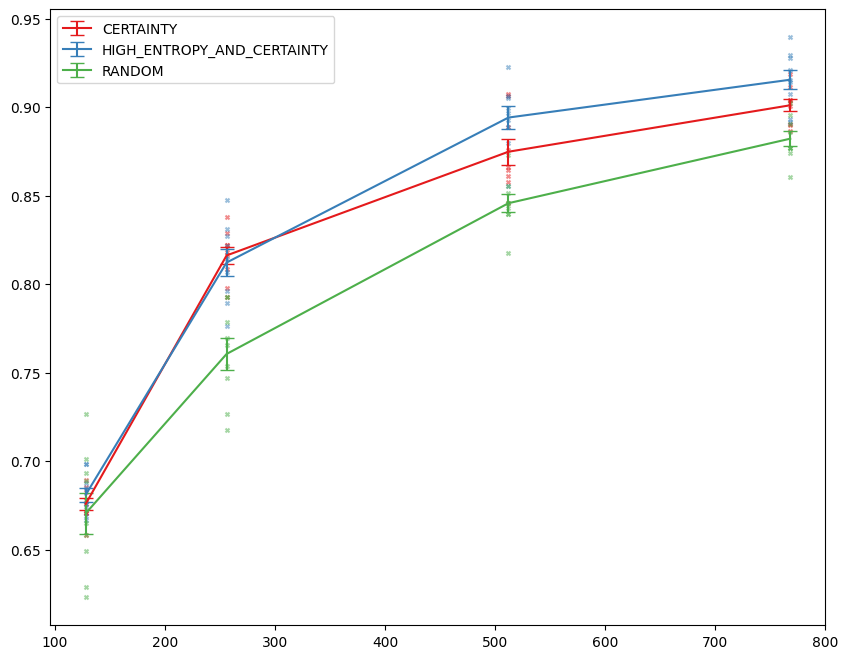

In [13]:
analyse("post-eval-winrate-imdb-m*-xmas-sweep2.csv")

../results/post-eval-winrate-tldr-m512-xmas-sweep.csv


m,512
acquire_pairs_function,
CERTAINTY,0.600446
RANDOM,0.554688


m,512
acquire_pairs_function,
CERTAINTY,0.014205
RANDOM,0.017116


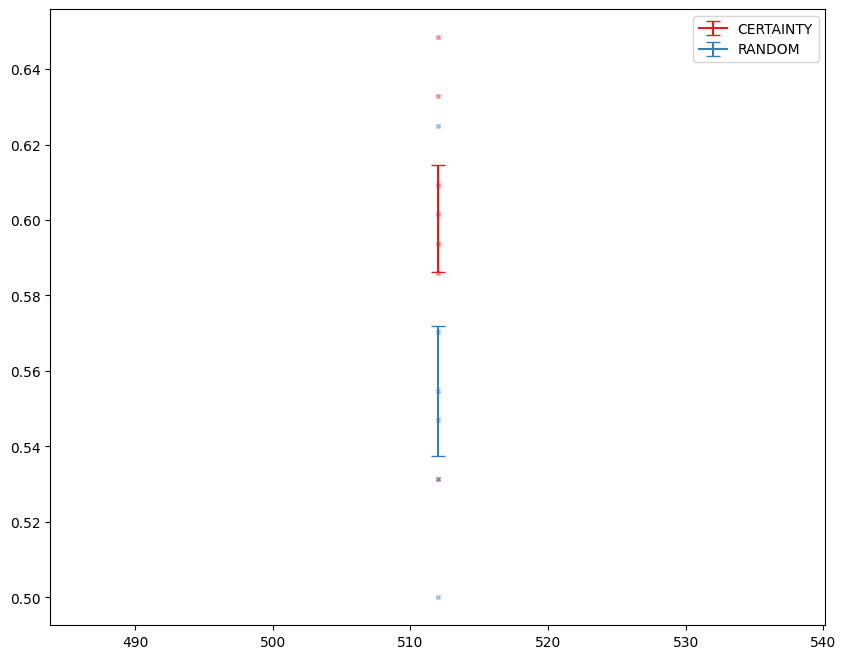

In [11]:
analyse("post-eval-winrate-tldr-m*-xmas-sweep.csv")
